<a href="https://colab.research.google.com/github/betulturkselci/Sentiment-Analysis-of-Youtube-Comments/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.4 MB/s 


##Import the libraries

In [ ]:
from textblob import TextBlob
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

##Loading Dataset

In [1]:
#from google.colab import files
#files.upload()

In [ ]:
df= pd.read_csv('youtube-comments-filter.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,text
0,Wow. 1.6 million dislikes
1,"If Tolkien didnt write it, then it shouldnât..."
2,We will always have the books. It doesn't matt...
3,"""be silent and keep your fork tongue behind yo..."
4,"Alright, it doesn't look bad. I'll give it a f..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


##Preprocessing the dataset

In [ ]:
df.head()

,text
0,Wow. 1.6 million dislikes
1,"If Tolkien didnt write it, then it shouldnât..."
2,We will always have the books. It doesn't matt...
3,"""be silent and keep your fork tongue behind yo..."
4,"Alright, it doesn't look bad. I'll give it a f..."


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for word in r:
        input_txt=re.sub(word, "",input_txt)
    return input_txt

In [ ]:
# remove youtube handles (@user)
df['clean_text']=np.vectorize(remove_pattern)(df['text'],"@[\w]*")

In [ ]:
df.head()

,text,clean_text
0,Wow. 1.6 million dislikes,Wow. 1.6 million dislikes
1,"If Tolkien didnt write it, then it shouldnât...","If Tolkien didnt write it, then it shouldnât..."
2,We will always have the books. It doesn't matt...,We will always have the books. It doesn't matt...
3,"""be silent and keep your fork tongue behind yo...","""be silent and keep your fork tongue behind yo..."
4,"Alright, it doesn't look bad. I'll give it a f...","Alright, it doesn't look bad. I'll give it a f..."


In [ ]:
# remove special characters, numbers and punctuations
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]"," ")
df.head()

,text,clean_text
0,Wow. 1.6 million dislikes,Wow million dislikes
1,"If Tolkien didnt write it, then it shouldnât...",If Tolkien didnt write it then it shouldn t...
2,We will always have the books. It doesn't matt...,We will always have the books It doesn t matt...
3,"""be silent and keep your fork tongue behind yo...",be silent and keep your fork tongue behind yo...
4,"Alright, it doesn't look bad. I'll give it a f...",Alright it doesn t look bad I ll give it a f...


In [ ]:
# remove short words
df['clean_text']= df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,text,clean_text
0,Wow. 1.6 million dislikes,million dislikes
1,"If Tolkien didnt write it, then it shouldnât...",Tolkien didnt write then shouldn exists Simple...
2,We will always have the books. It doesn't matt...,will always have books doesn matter what garba...
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongue behind your teeth
4,"Alright, it doesn't look bad. I'll give it a f...",Alright doesn look give fair shake


In [ ]:
# individual words considered as a tokens
tokenized_text= df['clean_text'].apply(lambda x: x.split())
tokenized_text.head()

0                                  [million, dislikes]
1    [Tolkien, didnt, write, then, shouldn, exists,...
2    [will, always, have, books, doesn, matter, wha...
3    [silent, keep, your, fork, tongue, behind, you...
4            [Alright, doesn, look, give, fair, shake]
Name: clean_text, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process(review):  
  swords=set(stopwords.words("english"))
  review=[w for w in review if w not in swords]
  return(" ".join(review))

In [ ]:
train_x_tum=[]
for r in range(len(df['clean_text'])):
  if(r+1)%100 ==0:
    print("No of reviews processed",r+1)
  train_x_tum=[].append(process(df['clean_text'][r]))

No of reviews processed 100
No of reviews processed 200
No of reviews processed 300
No of reviews processed 400
No of reviews processed 500
No of reviews processed 600
No of reviews processed 700
No of reviews processed 800
No of reviews processed 900
No of reviews processed 1000
No of reviews processed 1100
No of reviews processed 1200
No of reviews processed 1300
No of reviews processed 1400
No of reviews processed 1500
No of reviews processed 1600
No of reviews processed 1700
No of reviews processed 1800
No of reviews processed 1900
No of reviews processed 2000
No of reviews processed 2100
No of reviews processed 2200
No of reviews processed 2300
No of reviews processed 2400
No of reviews processed 2500
No of reviews processed 2600
No of reviews processed 2700
No of reviews processed 2800
No of reviews processed 2900
No of reviews processed 3000
No of reviews processed 3100
No of reviews processed 3200
No of reviews processed 3300
No of reviews processed 3400
No of reviews processed

In [ ]:
# stem the words
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

tokenized_text=tokenized_text.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_text.head()

0                                    [million, dislik]
1    [tolkien, didnt, write, then, shouldn, exist, ...
2    [will, alway, have, book, doesn, matter, what,...
3    [silent, keep, your, fork, tongu, behind, your...
4            [alright, doesn, look, give, fair, shake]
Name: clean_text, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i]= " ".join(tokenized_text[i])

df['clean_text']= tokenized_text
df.head()

,text,clean_text
0,Wow. 1.6 million dislikes,million dislik
1,"If Tolkien didnt write it, then it shouldnât...",tolkien didnt write then shouldn exist simpl t...
2,We will always have the books. It doesn't matt...,will alway have book doesn matter what garbag ...
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongu behind your teeth
4,"Alright, it doesn't look bad. I'll give it a f...",alright doesn look give fair shake


##Create a function to get the subjectivity

In [ ]:
def getSubjectivity(comment):
  return TextBlob(comment).sentiment.subjectivity

##Create a function to get polarity

In [ ]:
def getPolarity(comment):
  return TextBlob(comment).sentiment.polarity

##Create two new columns called 'Subjectivity' and 'Polarity'

In [ ]:
df['Subjectivity']=df['clean_text'].apply(getSubjectivity)
df['Polarity']=df['clean_text'].apply(getPolarity)
df.head()

,text,clean_text,Subjectivity,Polarity
0,Wow. 1.6 million dislikes,million dislik,0.0,0.0
1,"If Tolkien didnt write it, then it shouldnât...",tolkien didnt write then shouldn exist simpl t...,1.0,0.0
2,We will always have the books. It doesn't matt...,will alway have book doesn matter what garbag ...,0.0,0.0
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongu behind your teeth,0.4,-0.2
4,"Alright, it doesn't look bad. I'll give it a f...",alright doesn look give fair shake,0.9,0.7


##Create a function to get the sentiment text

In [ ]:
def getSentiment(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

In [ ]:
#Create a column to store the text sentiment
df['Sentiment']=df['Polarity'].apply(getSentiment)
df.head()

,text,clean_text,Subjectivity,Polarity,Sentiment
0,Wow. 1.6 million dislikes,million dislik,0.0,0.0,neutral
1,"If Tolkien didnt write it, then it shouldnât...",tolkien didnt write then shouldn exist simpl t...,1.0,0.0,neutral
2,We will always have the books. It doesn't matt...,will alway have book doesn matter what garbag ...,0.0,0.0,neutral
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongu behind your teeth,0.4,-0.2,negative
4,"Alright, it doesn't look bad. I'll give it a f...",alright doesn look give fair shake,0.9,0.7,positive


##Create a scatter plot to show the subjectivity and the polarity

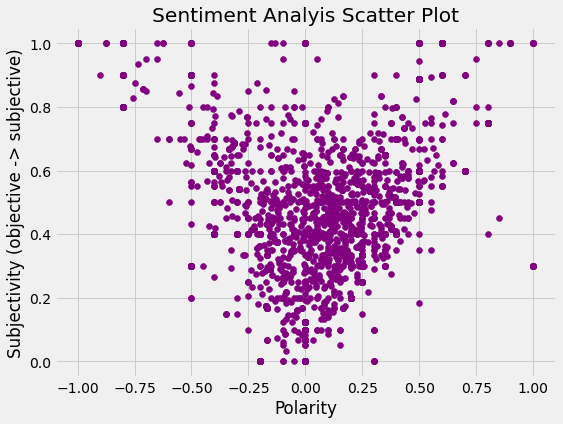

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Purple')
plt.title('Sentiment Analyis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

##Create a bar chart to shot count of positive, negative and neutral

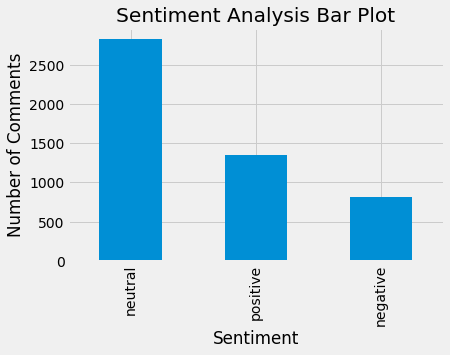

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#Create a function get the sentiment scores
def getSIA(text):
  sia=SentimentIntensityAnalyzer()
  sentiment=sia.polarity_scores(text)
  return sentiment

In [ ]:
#Get the sentiment scores for each day
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range(0, len(df['clean_text'])):
  SIA=getSIA(df['clean_text'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
#Store the sentiment scores in the youtube-comments data set
df['Compound']=compound
df['Negative']=neg
df['Neutral']=neu
df['Positive']=pos

In [ ]:
df.head(5)

,text,clean_text,Subjectivity,Polarity,Sentiment,Compound,Negative,Neutral,Positive
0,Wow. 1.6 million dislikes,million dislik,0.0,0.0,neutral,0.0000,0.000,1.000,0.000
1,"If Tolkien didnt write it, then it shouldnât...",tolkien didnt write then shouldn exist simpl t...,1.0,0.0,neutral,-0.1082,0.158,0.702,0.140
2,We will always have the books. It doesn't matt...,will alway have book doesn matter what garbag ...,0.0,0.0,neutral,0.2023,0.000,0.811,0.189
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongu behind your teeth,0.4,-0.2,negative,0.0000,0.000,1.000,0.000
4,"Alright, it doesn't look bad. I'll give it a f...",alright doesn look give fair shake,0.9,0.7,positive,0.3818,0.189,0.333,0.478


In [ ]:
df.to_csv('jupyter-dataset.csv',index = False,header=True,sep=',')

In [ ]:
#Create a list of columns to keep
keep_columns=['text','clean_text','Subjectivity','Polarity','Sentiment','Compound','Negative','Neutral','Positive']
df1=df[keep_columns]
df1.head()

,text,clean_text,Subjectivity,Polarity,Sentiment,Compound,Negative,Neutral,Positive
0,Wow. 1.6 million dislikes,million dislik,0.0,0.0,neutral,0.0000,0.000,1.000,0.000
1,"If Tolkien didnt write it, then it shouldnât...",tolkien didnt write then shouldn exist simpl t...,1.0,0.0,neutral,-0.1082,0.158,0.702,0.140
2,We will always have the books. It doesn't matt...,will alway have book doesn matter what garbag ...,0.0,0.0,neutral,0.2023,0.000,0.811,0.189
3,"""be silent and keep your fork tongue behind yo...",silent keep your fork tongu behind your teeth,0.4,-0.2,negative,0.0000,0.000,1.000,0.000
4,"Alright, it doesn't look bad. I'll give it a f...",alright doesn look give fair shake,0.9,0.7,positive,0.3818,0.189,0.333,0.478


In [ ]:
#Create the feature data set
#X=df1
#X=np.array(X.drop(['label'],1))
#Create the target data set
#y=np.array(df['label'])

In [ ]:
#Split the data into 80% training and 20% testing data sets
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Create and the train the model
#model=LinearDiscriminantAnalysis().fit(x_train, y_train)

##TFIDF

##LinearSVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
tfidf=TfidfVectorizer(max_features=5000)
X=df['clean_text']
y=df['Sentiment']

X=tfidf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf=LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.80      0.86       157
     neutral       0.91      0.99      0.95       588
    positive       0.91      0.79      0.85       255

    accuracy                           0.91      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.91      0.91      0.91      1000



In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[125,  17,  15],
       [  0, 584,   4],
       [  9,  44, 202]])

In [ ]:
#import mglearn

In [ ]:
#mglearn.plots.plot_confusion_matrix_illustration()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
y_test_pred=clf.predict(X_test)

In [ ]:
report=classification_report(y_test, y_test_pred,output_dict=True)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.90      0.48      0.63       157
     neutral       0.81      0.99      0.89       588
    positive       0.87      0.69      0.77       255

    accuracy                           0.83      1000
   macro avg       0.86      0.72      0.76      1000
weighted avg       0.84      0.83      0.82      1000



In [ ]:
cm= confusion_matrix(y_test,y_test_pred)
cm

array([[ 76,  62,  19],
       [  0, 581,   7],
       [  8,  71, 176]])

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.94      0.10      0.18       157
     neutral       0.76      0.97      0.85       588
    positive       0.73      0.66      0.69       255

    accuracy                           0.76      1000
   macro avg       0.81      0.58      0.58      1000
weighted avg       0.78      0.76      0.71      1000



In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 16,  95,  46],
       [  0, 571,  17],
       [  1,  86, 168]])

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.89      0.56      0.69       157
     neutral       0.89      0.99      0.93       588
    positive       0.82      0.79      0.81       255

    accuracy                           0.87      1000
   macro avg       0.87      0.78      0.81      1000
weighted avg       0.87      0.87      0.86      1000



In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 88,  33,  36],
       [  0, 580,   8],
       [ 11,  42, 202]])